In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import progressbar
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy.stats import binom 
from scipy.stats import norm
widgets = [
        'Test: ', progressbar.Percentage(),
        ' ', progressbar.Bar(marker=progressbar.RotatingMarker()),
        ' ', progressbar.ETA()]

In [25]:
x_values = np.array([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])
y_values = np.array([11.3,19.9,24.9,31.1,37.2,36.0,59.1,77.2,96.0,90.3,72.2,89.9,91.0,102.0,109.7,116.0,126.6,139.8])
x_values_cont = np.linspace(0.0,1,200)
sigma = 4.0

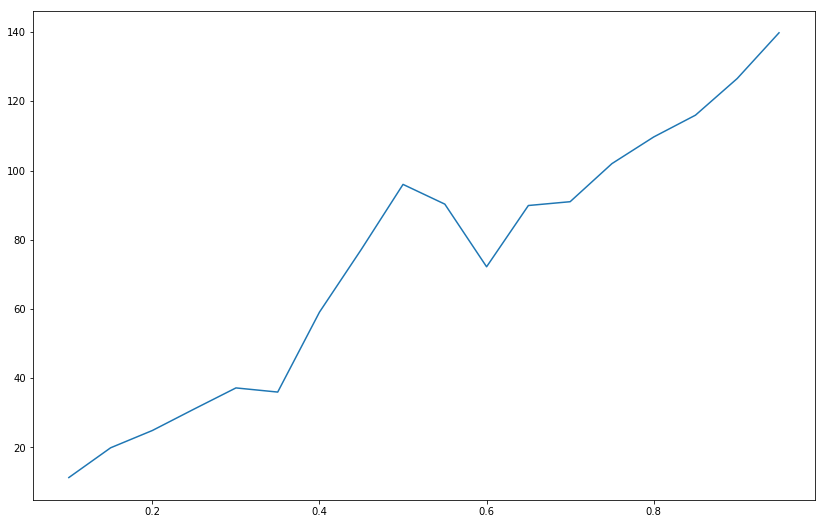

In [11]:
plt.figure(figsize=(14,9))
plt.plot(x_values,y_values)
plt.show()

In [22]:

def gaus(x,mean,sigma):
    factor1 = 1.0/(math.sqrt(2*math.pi)*sigma)
    factor2 = math.exp(-(x-mean)*(x-mean)/(2.0*sigma*sigma))                  
    return factor1*factor2

def PDF(x_values, y_values, sigma, model, A, B, C):
    result = 1.0
    for i in range(len(x_values)):
        result= result*gaus(y_values[i],model(x_values[i],A,B,C),sigma)
    return result

In [23]:
def model_a(x,A,B,C):
    return A+B*x+C*x*x

def model_b(x,A,B,C,D,x0,L):
    return A+B*x+C*x*x+D/((x-x0)*(x-x0)+L*L)

In [42]:
N_steps=200
A_range_par = np.linspace(-100,200,num=N_steps)
B_range_par = np.linspace(-100,200,num=N_steps)
C_range_par = np.linspace(-100,200,num=N_steps)
stepsize_A = A_range_par[1]-A_range_par[0]
stepsize_B = B_range_par[1]-B_range_par[0]
stepsize_C = C_range_par[1]-C_range_par[0]

mode_par=0.0
mode_a_par = mode_b_par = mode_c_par=0.0
norm_par = 0.0
count=0
PDF_values=np.zeros((N_steps,N_steps,N_steps))
maxvalue = len(A_range_par)*len(B_range_par)*len(C_range_par)
bar = progressbar.ProgressBar(widgets=widgets, maxval=maxvalue).start()
a_count=-1
for a in A_range_par:
    a_count+=1
    b_count=-1
    for b in B_range_par:
        b_count+=1
        c_count=-1
        for c in C_range_par:
            c_count+=1
            count+=1
            current_pdf_value = PDF(x_values,y_values,sigma,model_a,a,b,c)
            if current_pdf_value>=mode_par:
                mode_par= current_pdf_value
                mode_a_par=a
                mode_b_par=b
                mode_c_par=c
            norm_par+=current_pdf_value*stepsize_A*stepsize_B*stepsize_C
            PDF_values[a_count][b_count][c_count]=current_pdf_value
            bar.update(count)
            
bar.finish()       
print norm_par
print mode_par/norm_par
PDF_values=PDF_values/norm_par
print mode_a_par
print mode_b_par
print mode_c_par

Test: 100% |||||||||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:03:08


6.26670334392e-36
0.00121281703516
-8.04020100503
175.879396985
-30.6532663317


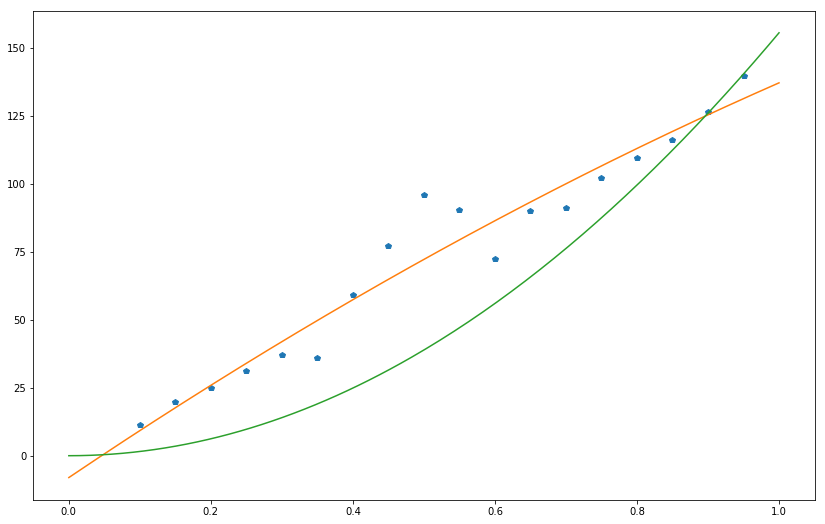

In [43]:
plt.figure(figsize=(14,9))
plt.plot(x_values,y_values,'p')
plt.plot(x_values_cont,model_a(x_values_cont,mode_a_par,mode_b_par,mode_c_par))
plt.plot(x_values_cont,model_a(x_values_cont,0,0,155.6))
plt.show()